An electron is subjected to an electromagnetic plane wave traveling in the $\hat{z}$-direction, and polarized in the $\hat{x}$-direction.

.

a) Plot the motion of the electron due to the electromagnetic field. (You may need three plots to do this.)

b) Plot the motion of the electron assuming there is an additional damping force of the form $\vec{F_d} = \gamma m \vec{v}$.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib nbagg

In [4]:
import sys

In [5]:
#In Natural Units
e = 0.302
m = 511
c = 1

q = -1*e

wavelength = 1
E0 = 1 #Solution DOES depend on this value

In [6]:
k = 2*np.pi/wavelength
w = c*k
B0 = E0/c

In [7]:
dvdt = lambda t, r, v, gamma=0: ((q/m)*E0*np.cos(k*r[2] - w*t) - gamma*v[0] - B0*np.cos(k*r[2] - w*t)*v[2], -1*gamma*v[1], -1*gamma*v[2] + B0*np.cos(k*r[2] - w*t)*v[0])

t0 = 0

x0 = 0
x_pr_0 = 0
y0 = 0
y_pr_0 = 0
z0 = 0
z_pr_0 = 0

x_lim = 3*wavelength #last x value
y_lim = x_lim #last y value
z_lim = x_lim #last z value

intlim = 1000 #No. of steps taken during integration
dt = x_lim/intlim #Resolution of integration

In [8]:
def solver(damping=0):
    times = []
    x_array = []
    dxdt_array = []
    y_array = []
    dydt_array = []
    z_array = []
    dzdt_array = [] 
    
    #print(len(times), len(x_array), len(y_array), len(z_array))    
    
    times.append(t0)
    x_array.append(x0)
    dxdt_array.append(x_pr_0)
    y_array.append(y0)
    dydt_array.append(y_pr_0) 
    z_array.append(z0)
    dzdt_array.append(z_pr_0)
    
    #print(len(times), len(x_array), len(y_array), len(z_array))

    for i in range(1, intlim):
        #print(i-1)
        
        (ax, ay, az) = dvdt(times[i-1], (x_array[i-1], y_array[i-1], z_array[i-1]), (dxdt_array[i-1], dydt_array[i-1], dzdt_array[i-1]), gamma=damping)
        
        vx = dxdt_array[i-1] + ax*dt
        vy = dydt_array[i-1] + ay*dt
        vz = dzdt_array[i-1] + az*dt
        
        x = x_array[i-1] + vx*dt
        y = y_array[i-1] + vy*dt
        z = z_array[i-1] + vz*dt
        
        t = times[i-1] + dt
        
        times.append(t)
        x_array.append(x)
        dxdt_array.append(vx)
        y_array.append(y)
        dydt_array.append(vy)
        z_array.append(z)
        dzdt_array.append(vz)
        
        #print(len(times), len(x_array), len(y_array), len(z_array))
        
    return times, np.array(x_array), np.array(y_array), np.array(z_array), np.array(dxdt_array), np.array(dydt_array), np.array(dzdt_array)

In [9]:
times, x_free, y_free, z_free, vx_free, vy_free, vz_free = solver()

In [10]:
times, x_damped1, y_damped1, z_damped1, vx_damped1, vy_damped1, vz_damped1 = solver(damping=0.1)

In [11]:
times, x_damped4, y_damped4, z_damped4, vx_damped4, vy_damped4, vz_damped4 = solver(damping=0.5)

In [12]:
times, x_damped2, y_damped2, z_damped2, vx_damped2, vy_damped2, vz_damped2 = solver(damping=1)

In [13]:
times, x_damped5, y_damped5, z_damped5, vx_damped5, vy_damped5, vz_damped5 = solver(damping=5)

In [14]:
times, x_damped3, y_damped3, z_damped3, vx_damped3, vy_damped3, vz_damped3 = solver(damping=10)

In [15]:
times, x_damped6, y_damped6, z_damped6, vx_damped6, vy_damped6, vz_damped6 = solver(damping=100)

<IPython.core.display.Javascript object>


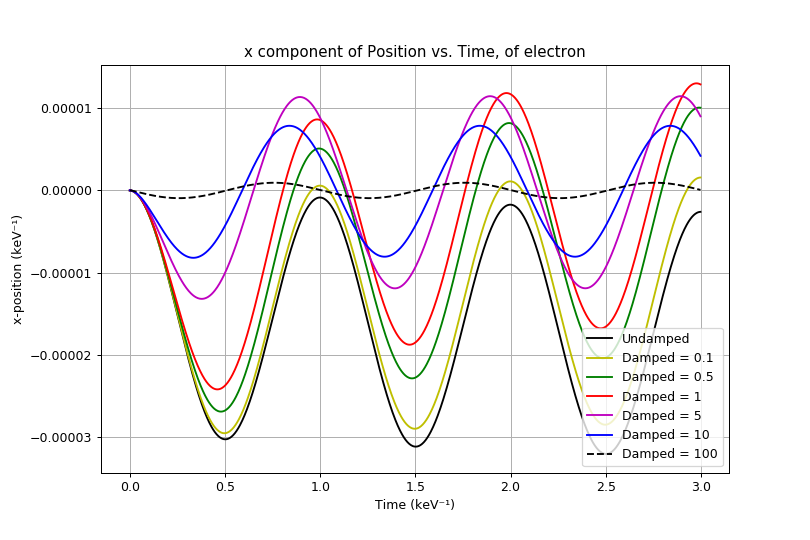

<IPython.core.display.Javascript object>


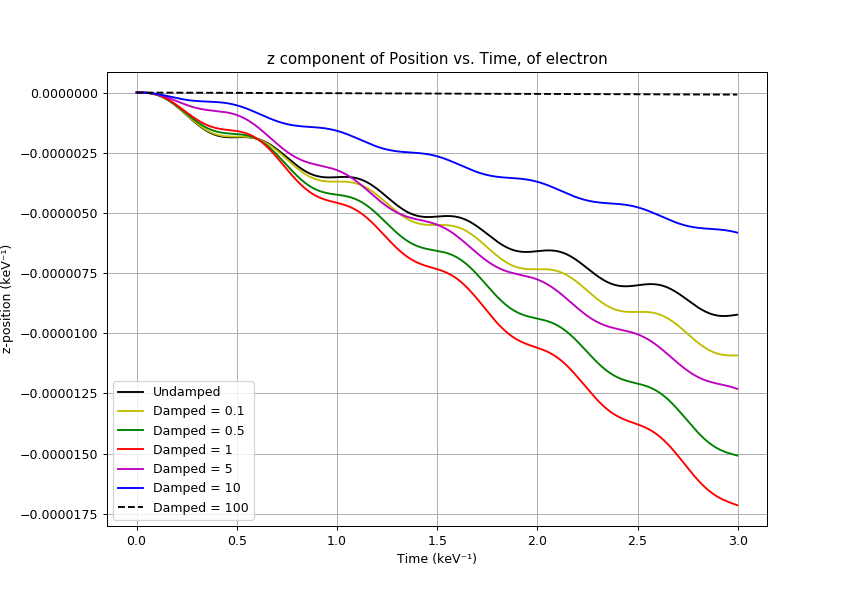

<IPython.core.display.Javascript object>


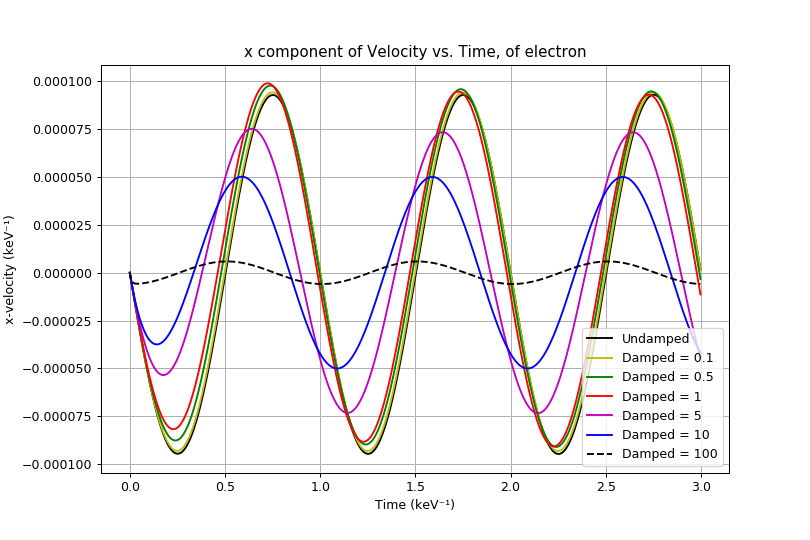

<IPython.core.display.Javascript object>


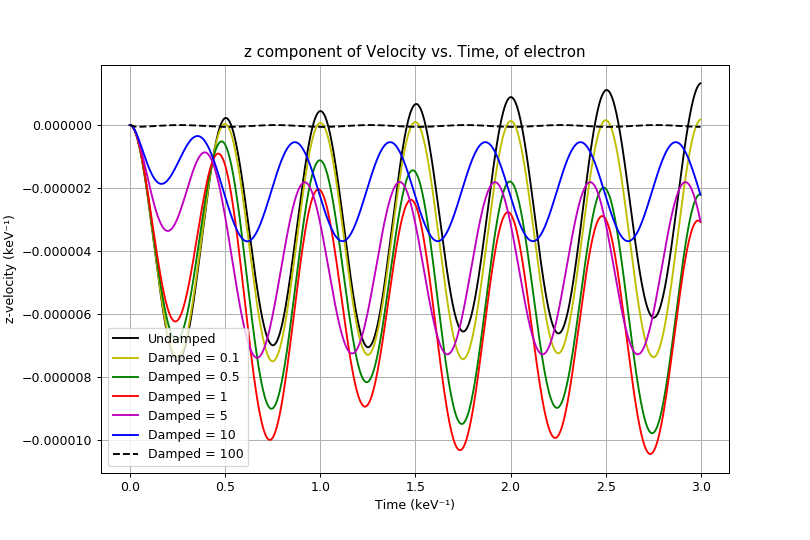

In [18]:
plt.close()

plt.figure(figsize=[9, 6])
plt.plot(times, x_free, 'k-', label="Undamped")
plt.plot(times, x_damped1, 'y-', label="Damped = 0.1")
plt.plot(times, x_damped4, 'g-', label="Damped = 0.5")
plt.plot(times, x_damped2, 'r-', label="Damped = 1")
plt.plot(times, x_damped5, 'm-', label="Damped = 5")
plt.plot(times, x_damped3, 'b-', label="Damped = 10")
plt.plot(times, x_damped6, 'k--', label="Damped = 100")
plt.xlabel("Time (keV\u207B\u00B9)")
plt.ylabel("x-position (keV\u207B\u00B9)")
plt.title("x component of Position vs. Time, of electron")
plt.legend()
plt.grid(True)

plt.figure(figsize=[9, 6])
plt.plot(times, z_free, 'k-', label="Undamped")
plt.plot(times, z_damped1, 'y-', label="Damped = 0.1")
plt.plot(times, z_damped4, 'g-', label="Damped = 0.5")
plt.plot(times, z_damped2, 'r-', label="Damped = 1")
plt.plot(times, z_damped5, 'm-', label="Damped = 5")
plt.plot(times, z_damped3, 'b-', label="Damped = 10")
plt.plot(times, z_damped6, 'k--', label="Damped = 100")
plt.xlabel("Time (keV\u207B\u00B9)")
plt.ylabel("z-position (keV\u207B\u00B9)")
plt.title("z component of Position vs. Time, of electron")
plt.legend()
plt.grid(True)

plt.figure(figsize=[9, 6])
plt.plot(times, vx_free, 'k-', label="Undamped")
plt.plot(times, vx_damped1, 'y-', label="Damped = 0.1")
plt.plot(times, vx_damped4, 'g-', label="Damped = 0.5")
plt.plot(times, vx_damped2, 'r-', label="Damped = 1")
plt.plot(times, vx_damped5, 'm-', label="Damped = 5")
plt.plot(times, vx_damped3, 'b-', label="Damped = 10")
plt.plot(times, vx_damped6, 'k--', label="Damped = 100")
plt.xlabel("Time (keV\u207B\u00B9)")
plt.ylabel("x-velocity (keV\u207B\u00B9)")
plt.title("x component of Velocity vs. Time, of electron")
plt.legend()
plt.grid(True)

plt.figure(figsize=[9, 6])
plt.plot(times, vz_free, 'k-', label="Undamped")
plt.plot(times, vz_damped1, 'y-', label="Damped = 0.1")
plt.plot(times, vz_damped4, 'g-', label="Damped = 0.5")
plt.plot(times, vz_damped2, 'r-', label="Damped = 1")
plt.plot(times, vz_damped5, 'm-', label="Damped = 5")
plt.plot(times, vz_damped3, 'b-', label="Damped = 10")
plt.plot(times, vz_damped6, 'k--', label="Damped = 100")
plt.xlabel("Time (keV\u207B\u00B9)")
plt.ylabel("z-velocity (keV\u207B\u00B9)")
plt.title("z component of Velocity vs. Time, of electron")
plt.legend()
plt.grid(True)

plt.show()

In [19]:
plt.close()
plt.close()
plt.close()
plt.close()

y = 0, for all time.